Populating the interactive namespace from numpy and matplotlib


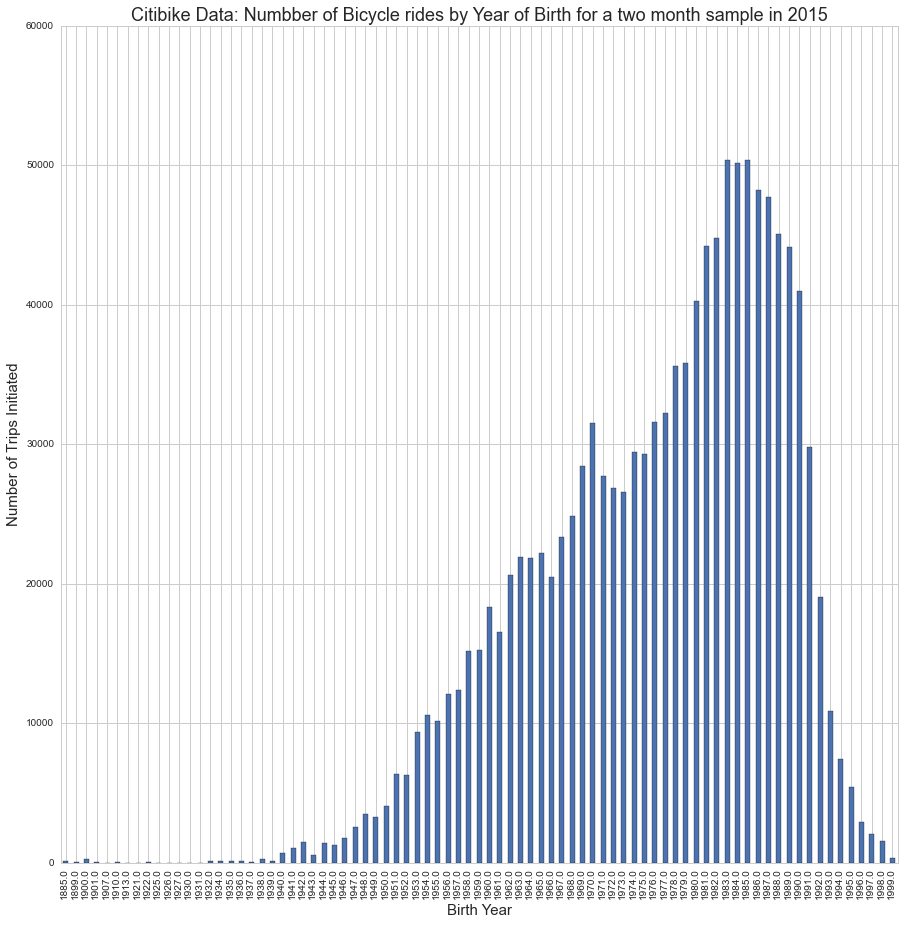

In [27]:


import pandas as pd 
from pandas import DataFrame 
import pylab as pl
import json
import numpy as np

import matplotlib.pyplot as plt


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
#import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)


%pylab inline

df=pd.read_csv('201503-citibike-tripdata.csv') #using one month, this is where the second month would go 
df2=pd.read_csv('201507-citibike-tripdata.csv') #using second month, to avert "seasonality in data"
#print df.head()

#df3=pd.read_csv('pop_nta.xlsx')#using population data by nta from nyc.gov via census 
#print df3.head()

#working with two data sets 
frames =[df, df2]
df=pd.concat(frames)

json_data = open('stationzips.json')
sz_data = json.load(json_data) #sz= 'stationzips.json' this file is a dictionary of station id keys and zipcode value pairs. 

df['ZipCode']=[sz_data['%s'%i] for i in df['start station id']]
#print df.columns


fig2=pl.figure(figsize(15,15))
zipbyage=(df['ZipCode'].groupby(df['birth year']).count())#Report: the number of zipcodes each year initiates
#print zipbyage.head()
zipbyage.plot(kind='bar')
pl.ylabel('Number of Trips Initiated', fontsize=15)
pl.xlabel('Birth Year', fontsize=15)
pl.title('Citibike Data: Numbber of Bicycle rides by Year of Birth for a two month sample in 2015', fontsize=18)
